<a href="https://colab.research.google.com/github/swoo-nam/project_final_team1/blob/main/%EC%A0%95%EC%88%98%EC%9D%B8_%EC%84%9C%EB%B9%84%EC%8A%A42_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%A0%84%EC%B2%98%EB%A6%AC%EB%B0%8F%EC%A6%9D%EA%B0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
DATA_PATH = "/content/drive/MyDrive/Colab Notebooks/data/"
SEED = 42

In [ ]:
!pip install translate

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [ ]:
import torch
from tqdm.auto import tqdm
import random
import os

def reset_seeds(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [ ]:
torch.cuda.is_available()

False

In [ ]:
!pip install transformers

In [ ]:
!pip install kiwipiepy

데이터 정제 및 전처리

In [ ]:
rawyogiyo_df = pd.read_csv(f"{DATA_PATH}yogiyo_reviews_0908.csv")
yogiyo_df = rawyogiyo_df.copy()
yogiyo_df

,가게이름,고객리뷰,별점,맛별점,양별점,배달별점,사장댓글,메뉴
0,1988응답하라추억의옛날도시락-방이점,맛있게 잘먹었습니다 묵사발도 시원하니 맛있네요,5,5.0,5.0,5.0,즐거운 순간을 저희와 함께해주셔서 감사합니다💖 \n\n보람차게 일할 수 있게 해 주...,[직화]삼겹옛날도시락
1,1988응답하라추억의옛날도시락-방이점,기름 있는 부분이 생각보다 많아요! 참고하세요:),5,5.0,5.0,5.0,소중한 의견 남겨 주셔서 감사합니다. 잘 새겨 듣고 앞으로 더욱 더 개선 할 수 있...,"[직화]삼겹옛날도시락,볶음김치"
2,1988응답하라추억의옛날도시락-방이점,양도 푸짐하고 맛있습니다! 청국장 냄새 많이 안나고 콩도 많이 들어있어서 좋았습니다!,5,5.0,5.0,5.0,늘 최고의 메뉴를 제공해드리고 싶습니다!😄 \n\n맛있는 메뉴를 넉넉하게 먹을 수 ...,"[직화]삼겹옛날도시락,우삼겹청국장찌개＋대접밥"
3,1988응답하라추억의옛날도시락-방이점,"..,........",5,5.0,5.0,5.0,저희 매장과 함께 편안한 시간 되셨을까요? \n\n1. 고객을 생각하는 마음 \n2...,삼겹정찬도시락
4,1988응답하라추억의옛날도시락-방이점,냉면을 따로 시키고 미니냉면을 합친것인데 양이 좀 적어보이고. 김치정식도 양이 적어...,5,5.0,4.0,5.0,이번 주문을 통해 한걸음 더 가까워진 것 같아 기분이 좋아요!😁\n\n고객님의 행복...,"갈비옛날도시락＋미니냉면＋（서비스）콜라,스팸옛날도시락＋김찌 정식＋（서비스）콜라,부드러..."
...,...,...,...,...,...,...,...,...
37135,짬뽕관-전주금암점,맛있어요 ㅎ저번에주문하고 맛있어서또주문핰건데\n늦은시간에시켜서그렄지 국물이 엄청 걸...,5,5.0,5.0,5.0,고객님 안녕하세요 짬뽕관입니다~~^-^\n소중한 리뷰 너무 감사합니다!!🙂\n재주문...,짬뽕 ＋ 탕수육 set
37136,짬뽕관-전주금암점,맛있어요 또시킬게요,5,5.0,5.0,5.0,고객님 안녕하요 짬뽕관입니다!!^_^\n소중한 리뷰 남겨주셔 서 정말 달감사합니다!...,순두부짬뽕
37137,짬뽕관-전주금암점,정말 맛있게 잘먹었어요!!자주 시켜 먹을께요!,5,5.0,5.0,5.0,고객님 안녕하세요 짬뽕관입니다~~^_^\n맛있게 드셨다는 말씀에 힘이 나는거 같습니...,콩국수
37138,짬뽕관-전주금암점,와우.. 여기뭐죠 주변에서 맛있다고 먹어보라해서 시켰는데 육수가 일단 시원칼칼하니 ...,5,5.0,5.0,5.0,고객님 안녕하세요 짬뽕관입니다!!^_^\n맛있게 드셔주시고 정성스러운 사진 리뷰까지...,"차슈짬뽕,마파두부밥"


In [ ]:
yogiyo_df["고객리뷰"] = yogiyo_df["고객리뷰"].str.replace("[^가-힣0-9 .,!?]" , " ",regex=True)
yogiyo_df["사장댓글"] = yogiyo_df["사장댓글"].str.replace("[^가-힣0-9 .,!?]" , " ",regex=True)

yogiyo_df

,가게이름,고객리뷰,별점,맛별점,양별점,배달별점,사장댓글,메뉴
0,1988응답하라추억의옛날도시락-방이점,맛있게 잘먹었습니다 묵사발도 시원하니 맛있네요,5,5.0,5.0,5.0,즐거운 순간을 저희와 함께해주셔서 감사합니다 보람차게 일할 수 있게 해 주셔서...,[직화]삼겹옛날도시락
1,1988응답하라추억의옛날도시락-방이점,기름 있는 부분이 생각보다 많아요! 참고하세요,5,5.0,5.0,5.0,소중한 의견 남겨 주셔서 감사합니다. 잘 새겨 듣고 앞으로 더욱 더 개선 할 수 있...,"[직화]삼겹옛날도시락,볶음김치"
2,1988응답하라추억의옛날도시락-방이점,양도 푸짐하고 맛있습니다! 청국장 냄새 많이 안나고 콩도 많이 들어있어서 좋았습니다!,5,5.0,5.0,5.0,늘 최고의 메뉴를 제공해드리고 싶습니다! 맛있는 메뉴를 넉넉하게 먹을 수 있는...,"[직화]삼겹옛날도시락,우삼겹청국장찌개＋대접밥"
3,1988응답하라추억의옛날도시락-방이점,"..,........",5,5.0,5.0,5.0,저희 매장과 함께 편안한 시간 되셨을까요? 1. 고객을 생각하는 마음 2. 더...,삼겹정찬도시락
4,1988응답하라추억의옛날도시락-방이점,냉면을 따로 시키고 미니냉면을 합친것인데 양이 좀 적어보이고. 김치정식도 양이 적어...,5,5.0,4.0,5.0,이번 주문을 통해 한걸음 더 가까워진 것 같아 기분이 좋아요! 고객님의 행복한 ...,"갈비옛날도시락＋미니냉면＋（서비스）콜라,스팸옛날도시락＋김찌 정식＋（서비스）콜라,부드러..."
...,...,...,...,...,...,...,...,...
37135,짬뽕관-전주금암점,맛있어요 저번에주문하고 맛있어서또주문핰건데 늦은시간에시켜서그렄지 국물이 엄청 걸쭉...,5,5.0,5.0,5.0,고객님 안녕하세요 짬뽕관입니다 소중한 리뷰 너무 감사합니다!! 재주문해 ...,짬뽕 ＋ 탕수육 set
37136,짬뽕관-전주금암점,맛있어요 또시킬게요,5,5.0,5.0,5.0,고객님 안녕하요 짬뽕관입니다!! 소중한 리뷰 남겨주셔 서 정말 달감사합니다!!...,순두부짬뽕
37137,짬뽕관-전주금암점,정말 맛있게 잘먹었어요!!자주 시켜 먹을께요!,5,5.0,5.0,5.0,고객님 안녕하세요 짬뽕관입니다 맛있게 드셨다는 말씀에 힘이 나는거 같습니다...,콩국수
37138,짬뽕관-전주금암점,와우.. 여기뭐죠 주변에서 맛있다고 먹어보라해서 시켰는데 육수가 일단 시원칼칼하니 ...,5,5.0,5.0,5.0,고객님 안녕하세요 짬뽕관입니다!! 맛있게 드셔주시고 정성스러운 사진 리뷰까지 ...,"차슈짬뽕,마파두부밥"


가게 이름 제거

In [ ]:
ygy_store_lst = set(rawyogiyo_df["가게이름"])
len(ygy_store_lst)

167

In [ ]:
ygy_store_lst = [re.split("[-,& ]", i ) for i in ygy_store_lst]

In [ ]:
ygy_store_lst = sum(ygy_store_lst, [])

In [ ]:
additional = ["당신은", "치킨이", "땡긴다", "치킨", "1988응답하라", '1988응답하라추억의옛날도시락의', "1988응답하라추억의옛날도시락입니다.","1988응답하라추억의옛날도시락을",
              "짬뽕관입니다", "짬뽕관입니다!!", "짬뽕관입니다,", "짬뽕관입니다!", "짬뽕관입니다.",
              "곱도리탕", "승도리네곱도리탕김포풍무점",
              ]
ygy_store_lst = ygy_store_lst + additional

In [ ]:
'치킨이' in ygy_store_lst

True

In [ ]:
text = '저희 1988응답하라추억의옛날도시락의 메뉴를 선택해 주셔서 감사합니다. 많이 짜셨을까요? 조리 과정을 다시 살펴 보고, 미흡했던 점은 없었는지 확인 하도록 하겠습니다. 그리고 다음에 오실 때 요청 사항에 이 내용 남겨주시면, 저희가 더 신경을 쓸 수 있도록 하겠습니다. 그땐 꼭 온전한 만족감을 드릴 수 있도록 최선을 다하겠습니다. 감사합니다.'
text_words = text.split()
[word for word in text_words if word not in ygy_store_lst]

['저희',
 '메뉴를',
 '선택해',
 '주셔서',
 '감사합니다.',
 '많이',
 '짜셨을까요?',
 '조리',
 '과정을',
 '다시',
 '살펴',
 '보고,',
 '미흡했던',
 '점은',
 '없었는지',
 '확인',
 '하도록',
 '하겠습니다.',
 '그리고',
 '다음에',
 '오실',
 '때',
 '요청',
 '사항에',
 '이',
 '내용',
 '남겨주시면,',
 '저희가',
 '더',
 '신경을',
 '쓸',
 '수',
 '있도록',
 '하겠습니다.',
 '그땐',
 '꼭',
 '온전한',
 '만족감을',
 '드릴',
 '수',
 '있도록',
 '최선을',
 '다하겠습니다.',
 '감사합니다.']

In [ ]:
new_replys = []

for reply in yogiyo_df["사장댓글"]:

  words = reply.split(" ")
  new_words = []

  new_reply_words = [word for word in words if word not in ygy_store_lst]
  new_reply = ' '.join(new_reply_words)

  new_replys.append(new_reply)

yogiyo_df["사장댓글"] = new_replys
yogiyo_df

,가게이름,고객리뷰,별점,맛별점,양별점,배달별점,사장댓글,메뉴
0,1988응답하라추억의옛날도시락-방이점,맛있게 잘먹었습니다 묵사발도 시원하니 맛있네요,5,5.0,5.0,5.0,즐거운 순간을 저희와 함께해주셔서 감사합니다 보람차게 일할 수 있게 해 주셔서 감사...,[직화]삼겹옛날도시락
1,1988응답하라추억의옛날도시락-방이점,기름 있는 부분이 생각보다 많아요! 참고하세요,5,5.0,5.0,5.0,소중한 의견 남겨 주셔서 감사합니다. 잘 새겨 듣고 앞으로 더욱 더 개선 할 수 있...,"[직화]삼겹옛날도시락,볶음김치"
2,1988응답하라추억의옛날도시락-방이점,양도 푸짐하고 맛있습니다! 청국장 냄새 많이 안나고 콩도 많이 들어있어서 좋았습니다!,5,5.0,5.0,5.0,늘 최고의 메뉴를 제공해드리고 싶습니다! 맛있는 메뉴를 넉넉하게 먹을 수 있는 것보...,"[직화]삼겹옛날도시락,우삼겹청국장찌개＋대접밥"
3,1988응답하라추억의옛날도시락-방이점,"..,........",5,5.0,5.0,5.0,저희 매장과 함께 편안한 시간 되셨을까요? 1. 고객을 생각하는 마음 2. 더 나은...,삼겹정찬도시락
4,1988응답하라추억의옛날도시락-방이점,냉면을 따로 시키고 미니냉면을 합친것인데 양이 좀 적어보이고. 김치정식도 양이 적어...,5,5.0,4.0,5.0,이번 주문을 통해 한걸음 더 가까워진 것 같아 기분이 좋아요! 고객님의 행복한 시간...,"갈비옛날도시락＋미니냉면＋（서비스）콜라,스팸옛날도시락＋김찌 정식＋（서비스）콜라,부드러..."
...,...,...,...,...,...,...,...,...
37135,짬뽕관-전주금암점,맛있어요 저번에주문하고 맛있어서또주문핰건데 늦은시간에시켜서그렄지 국물이 엄청 걸쭉...,5,5.0,5.0,5.0,고객님 안녕하세요 소중한 리뷰 너무 감사합니다!! 재주문해 주셨는데 국물양이 살짝 ...,짬뽕 ＋ 탕수육 set
37136,짬뽕관-전주금암점,맛있어요 또시킬게요,5,5.0,5.0,5.0,고객님 안녕하요 소중한 리뷰 남겨주셔 서 정말 달감사합니다!! 만족스러운 식사가 되...,순두부짬뽕
37137,짬뽕관-전주금암점,정말 맛있게 잘먹었어요!!자주 시켜 먹을께요!,5,5.0,5.0,5.0,고객님 안녕하세요 맛있게 드셨다는 말씀에 힘이 나는거 같습니다 항상 변함없는 맛으로...,콩국수
37138,짬뽕관-전주금암점,와우.. 여기뭐죠 주변에서 맛있다고 먹어보라해서 시켰는데 육수가 일단 시원칼칼하니 ...,5,5.0,5.0,5.0,고객님 안녕하세요 맛있게 드셔주시고 정성스러운 사진 리뷰까지 정말 감사합니다 매일매...,"차슈짬뽕,마파두부밥"


 ** 님 고객님으로 수정

In [ ]:
yogiyo_df["사장댓글"] = yogiyo_df["사장댓글"].str.replace(r'\w+\s*님', '고객님', regex=True)
yogiyo_df

,가게이름,고객리뷰,별점,맛별점,양별점,배달별점,사장댓글,메뉴
0,1988응답하라추억의옛날도시락-방이점,맛있게 잘먹었습니다 묵사발도 시원하니 맛있네요,5,5.0,5.0,5.0,즐거운 순간을 저희와 함께해주셔서 감사합니다 보람차게 일할 수 있게 해 주셔서 감사...,[직화]삼겹옛날도시락
1,1988응답하라추억의옛날도시락-방이점,기름 있는 부분이 생각보다 많아요! 참고하세요,5,5.0,5.0,5.0,소중한 의견 남겨 주셔서 감사합니다. 잘 새겨 듣고 앞으로 더욱 더 개선 할 수 있...,"[직화]삼겹옛날도시락,볶음김치"
2,1988응답하라추억의옛날도시락-방이점,양도 푸짐하고 맛있습니다! 청국장 냄새 많이 안나고 콩도 많이 들어있어서 좋았습니다!,5,5.0,5.0,5.0,늘 최고의 메뉴를 제공해드리고 싶습니다! 맛있는 메뉴를 넉넉하게 먹을 수 있는 것보...,"[직화]삼겹옛날도시락,우삼겹청국장찌개＋대접밥"
3,1988응답하라추억의옛날도시락-방이점,"..,........",5,5.0,5.0,5.0,저희 매장과 함께 편안한 시간 되셨을까요? 1. 고객을 생각하는 마음 2. 더 나은...,삼겹정찬도시락
4,1988응답하라추억의옛날도시락-방이점,냉면을 따로 시키고 미니냉면을 합친것인데 양이 좀 적어보이고. 김치정식도 양이 적어...,5,5.0,4.0,5.0,이번 주문을 통해 한걸음 더 가까워진 것 같아 기분이 좋아요! 고객님의 행복한 시간...,"갈비옛날도시락＋미니냉면＋（서비스）콜라,스팸옛날도시락＋김찌 정식＋（서비스）콜라,부드러..."
...,...,...,...,...,...,...,...,...
37135,짬뽕관-전주금암점,맛있어요 저번에주문하고 맛있어서또주문핰건데 늦은시간에시켜서그렄지 국물이 엄청 걸쭉...,5,5.0,5.0,5.0,고객님 안녕하세요 소중한 리뷰 너무 감사합니다!! 재주문해 주셨는데 국물양이 살짝 ...,짬뽕 ＋ 탕수육 set
37136,짬뽕관-전주금암점,맛있어요 또시킬게요,5,5.0,5.0,5.0,고객님 안녕하요 소중한 리뷰 남겨주셔 서 정말 달감사합니다!! 만족스러운 식사가 되...,순두부짬뽕
37137,짬뽕관-전주금암점,정말 맛있게 잘먹었어요!!자주 시켜 먹을께요!,5,5.0,5.0,5.0,고객님 안녕하세요 맛있게 드셨다는 말씀에 힘이 나는거 같습니다 항상 변함없는 맛으로...,콩국수
37138,짬뽕관-전주금암점,와우.. 여기뭐죠 주변에서 맛있다고 먹어보라해서 시켰는데 육수가 일단 시원칼칼하니 ...,5,5.0,5.0,5.0,고객님 안녕하세요 맛있게 드셔주시고 정성스러운 사진 리뷰까지 정말 감사합니다 매일매...,"차슈짬뽕,마파두부밥"


In [ ]:
yogiyo_df["고객리뷰"] = [' '.join(i.split()) for i in yogiyo_df["고객리뷰"]]
yogiyo_df["사장댓글"] = [' '.join(i.split()) for i in yogiyo_df["사장댓글"]]

낮은 별점 데이터 증강  
별점 4점이하인 데이터들을 증강하고 학습을 시켜보고자함  

텍스트 데이터 불균형 해소를 위한 증강 방법
1. Random deletion
2. Random swap
3. Back translation


In [ ]:
rate_counts = yogiyo_df["별점"].value_counts().sort_index(ascending=False)
rate_counts

5    35164
4     1234
3      385
2      137
1      220
Name: 별점, dtype: int64

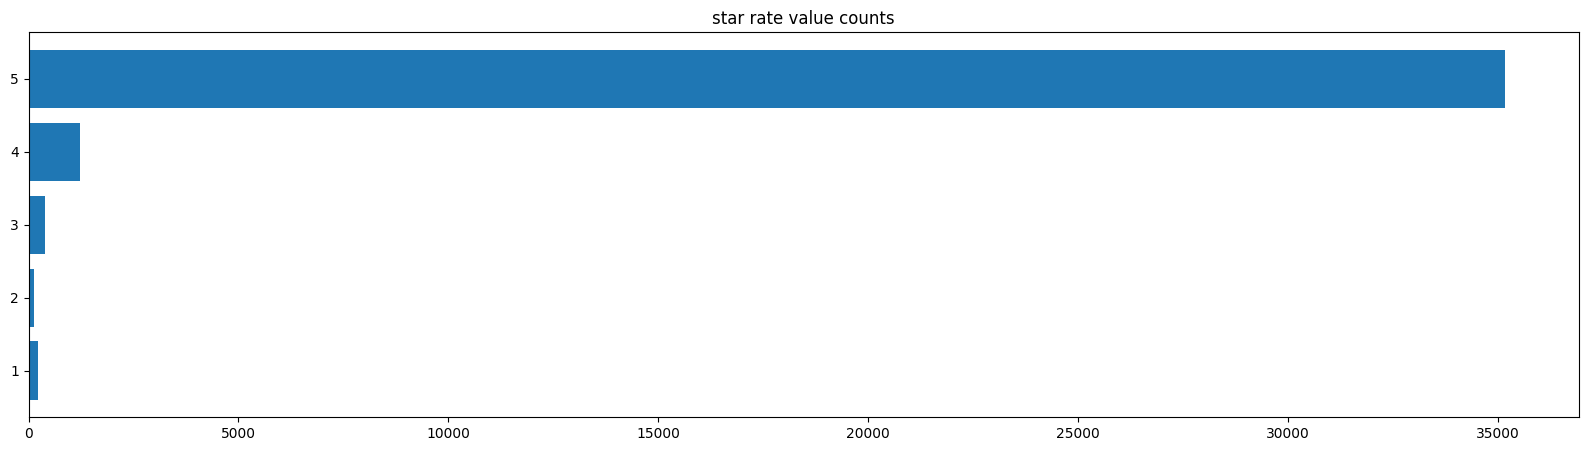

In [ ]:
plt.figure(figsize=(20, 5))
plt.barh([5,4,3,2,1], rate_counts)
plt.title("star rate value counts")
plt.show()

In [ ]:
########################################################################
# Random deletion
# Randomly delete words from the sentence with probability p
########################################################################

def random_deletion(words, p):
	if len(words) == 1:
		return words

	new_words = []
	for word in words:
		r = random.uniform(0, 1)
		if r > p:
			new_words.append(word)

	if len(new_words) == 0:
		rand_int = random.randint(0, len(words)-1)
		return [words[rand_int]]

	return new_words

In [ ]:
########################################################################
# Random swap
# Randomly swap two words in the sentence n times
########################################################################

def random_swap(words, n):
	new_words = words.copy()
	for _ in range(n):
		new_words = swap_word(new_words)

	return new_words

def swap_word(new_words):
	random_idx_1 = random.randint(0, len(new_words)-1)
	random_idx_2 = random_idx_1
	counter = 0

	while random_idx_2 == random_idx_1:
		random_idx_2 = random.randint(0, len(new_words)-1)
		counter += 1
		if counter > 3:
			return new_words

	new_words[random_idx_1], new_words[random_idx_2] = new_words[random_idx_2], new_words[random_idx_1]
	return new_words

In [ ]:
from translate import Translator

ko = "진짜리뷰안쓰는데 양이 2만원씩내고 먹을양은 절대아닙니다 장난하는것도아니고"

translator_ko2en = Translator(to_lang="en", from_lang="ko")
translator_en2ko = Translator(to_lang="ko", from_lang="en")
translator_ko2ja = Translator(to_lang="ja", from_lang="ko")
translator_ja2ko = Translator(to_lang="ko", from_lang="ja")

ko2en = translator_ko2en.translate(ko)
en2ko = translator_en2ko.translate(ko2en)
ko2ja = translator_ko2ja.translate(ko)
ja2ko = translator_ja2ko.translate(ko2ja)

print (f"원문 : {ko}")
print (f"번역문 : {ko2en}")
print (f"역번역문 : {en2ko}")
print (f"번역문 : {ko2ja}")
print (f"역번역문 : {ja2ko}")


원문 : 진짜리뷰안쓰는데 양이 2만원씩내고 먹을양은 절대아닙니다 장난하는것도아니고
번역문 : I don't really use reviews, but the amount costs 20,000 won and it's never the amount to eat. I'm not kidding.
역번역문 : 후기를 잘 안쓰는데 금액이 2만원이고 절대 먹을 금액이 아닙니다. 농담이 아닙니다.
번역문 : レビューはあまり使っていませんが、金額は2万ウォンで、決して食べる量ではありません。冗談ではありません。
역번역문 : 후기는 많이 쓰지 않지만 금액이 2만원이라 절대 먹기에 부족함이 없습니다. 농담이 아닙니다.


In [ ]:
# Back Transration
# 너무~ 오래걸려~~
# 포기~~

def back_transration(words):

  translator_ko2en = Translator(to_lang="en", from_lang="ko")
  translator_en2ko = Translator(to_lang="ko", from_lang="en")
  translator_ko2ja = Translator(to_lang="ja", from_lang="ko")
  translator_ja2ko = Translator(to_lang="ko", from_lang="ja")

  ko2en = translator_ko2en.translate(words)
  en2ko_words = translator_en2ko.translate(ko2en)
  ko2ja = translator_ko2ja.translate(words)
  ja2ko_words = translator_ja2ko.translate(ko2ja)

  return [en2ko_words, ja2ko_words]

In [ ]:
from torch.cuda.random import seed
def EDA(sentence, alpha_rs=0.1, p_rd=0.2, num_aug = 4):

  new_sentences = []
  words = sentence.split(' ')
  num_words = len(words)

  if num_words > 5 :

    n_rs = max(1, int(alpha_rs*num_words))

    # Random deletion
    for _ in range(num_aug):
      a_words = random_deletion(words, p_rd)
      new_sentences.append(" ".join(a_words))

    # Random swap
    for _ in range(num_aug):
      a_words = random_swap(words, n_rs)
      new_sentences.append(" ".join(a_words))

    return new_sentences

  else : return [sentence]


In [ ]:
yogiyo_df["고객리뷰"][1]

'기름 있는 부분이 생각보다 많아요! 참고하세요'

In [ ]:
sentence = yogiyo_df["고객리뷰"][1]
EDA(sentence)

['기름 있는 부분이 생각보다 많아요! 참고하세요',
 '기름 있는 부분이 생각보다 많아요! 참고하세요',
 '기름 있는 부분이',
 '기름 있는 부분이 생각보다 많아요! 참고하세요',
 '기름 있는 생각보다 부분이 많아요! 참고하세요',
 '기름 있는 많아요! 생각보다 부분이 참고하세요',
 '생각보다 있는 부분이 기름 많아요! 참고하세요',
 '기름 있는 부분이 생각보다 참고하세요 많아요!']

In [ ]:
mask = yogiyo_df["별점"] < 5
neg_df = yogiyo_df[mask][["고객리뷰", "사장댓글", "별점"]].copy()
neg_df.reset_index(drop = True, inplace=True)
neg_df

,고객리뷰,사장댓글,별점
0,맛있습니다! 근데 국물이 안와서 아쉽습니다..,안녕하세요 저희 측 실수로 인하여 누락이 되었군요... 이에 대해서 사과 말씀 드립...,4
1,저저번달에 맛있게 먹어서 또 시켰는데 고기 양이 엄청 줄었네요 ..된장찌개도 엄청 ...,저희 메뉴를 주문해 주셔서 감사합니다. 양이 줄었다고 느끼셨군요. 항상 정량대로 조...,4
2,20분 이내 배달 알림 주시고는 한시간이 지나서야 받았습니다. 배달이 늦는 점에 대...,안녕하세요 입니다. 남겨 주신 리뷰 잘 읽어보았습니다. 먼저 매장 상황을 잘 파악하...,2
3,맛이나 양은 무난해요 그런데... 배달예정시간이 무색하게 늦게도착 차라리 배달 예정...,선택해 주셔서 감사합니다. 저희 매장에서는 배달로 드릴 때 배달 시간을 지키기 위해...,3
4,"메인은 좋았는데, 아... 반찬이 다 쉬어 모두 버렸어요 한번 씹는데 촉감,맛이 이...",안녕하세요 입니다. 우선 감사하게도 저희 매장을 찾아 주셨는데 불편함을 겪게 해드려...,3
...,...,...,...
1971,짜장 춘장맛만 나는 짬뽕 맛있게 매운 군만두 넹,저희 짬뽕관을 이용해 주셔서 감사합니다. 다음 주문은 더 맛있게 조리하여 별점 다섯...,4
1972,탕수육은 비추. 돌 같은 식감 짬뽕은 맛있어요,저희 짬뽕관을 이용해 주셔서 감사합니다. 우선 식사시간에 아쉬움을 드려 정말 죄송합...,4
1973,잘먹었습니다 감사합니다,고객님 안녕하세요 맛있게 드셨다는 말씀에 힘이 나는거 같습니다 항상 변함없는 맛으로...,4
1974,요기요 사진보고 맛있어보여시킨건데 너무하잖아 이건 이게 만원짜리 짬뽕인가요? 와 장...,고객님 안녕하세요 우선 즐거운 식사 시간에 불편을 드려 너무 죄송합니다.믿고 주문 ...,1


In [ ]:
eda_reviews = {"고객리뷰":[], "사장댓글":[], "별점":[]}

for _, row  in tqdm(neg_df.iterrows(), total = neg_df.shape[0]):
  num = len(EDA(row["고객리뷰"]))
  eda_reviews["고객리뷰"].extend(EDA(row["고객리뷰"]))
  eda_reviews["사장댓글"].extend([ row["사장댓글"] for i in range(num)])
  eda_reviews["별점"].extend([ row["별점"] for i in range(num)])



  0%|          | 0/1976 [00:00<?, ?it/s]

In [ ]:
len(eda_reviews["고객리뷰"]), len(eda_reviews["사장댓글"])

(10894, 10894)

In [ ]:
eda_df = pd.DataFrame(eda_reviews)
eda_df

,고객리뷰,사장댓글,별점
0,맛있습니다! 근데 국물이 안와서 아쉽습니다..,안녕하세요 저희 측 실수로 인하여 누락이 되었군요... 이에 대해서 사과 말씀 드립...,4
1,맛있게 또 양이 엄청 줄었네요 엄청 짜고 그래도 맛은,저희 메뉴를 주문해 주셔서 감사합니다. 양이 줄었다고 느끼셨군요. 항상 정량대로 조...,4
2,저저번달에 맛있게 먹어서 또 시켰는데 고기 양이 엄청 줄었네요 엄청 그래도 맛은 있었어요,저희 메뉴를 주문해 주셔서 감사합니다. 양이 줄었다고 느끼셨군요. 항상 정량대로 조...,4
3,저저번달에 맛있게 시켰는데 고기 양이 엄청 줄었네요 짜고 맛은,저희 메뉴를 주문해 주셔서 감사합니다. 양이 줄었다고 느끼셨군요. 항상 정량대로 조...,4
4,저저번달에 먹어서 또 시켰는데 고기 양이 엄청 엄청 짜고 그래도 맛은,저희 메뉴를 주문해 주셔서 감사합니다. 양이 줄었다고 느끼셨군요. 항상 정량대로 조...,4
...,...,...,...
10889,요기요 사진보고 맛있어보여시킨건데 너무하잖아 이건 이게 진짜 짬뽕인가요? 와 장사너...,고객님 안녕하세요 우선 즐거운 식사 시간에 불편을 드려 너무 죄송합니다.믿고 주문 ...,1
10890,요기요 사진보고 맛있어보여시킨건데 너무하잖아 이건 그냥 만원짜리 짬뽕인가요? 와 장...,고객님 안녕하세요 우선 즐거운 식사 시간에 불편을 드려 너무 죄송합니다.믿고 주문 ...,1
10891,요기요 사진보고 맛있어보여시킨건데 너무하잖아 이건 명품관? 배달기사가 짬뽕인가요? ...,고객님 안녕하세요 우선 즐거운 식사 시간에 불편을 드려 너무 죄송합니다.믿고 주문 ...,1
10892,요기요 사진보고 맛있어보여시킨건데 너무하잖아 이건 이게 만원짜리 짬뽕인가요? 와 장...,고객님 안녕하세요 우선 즐거운 식사 시간에 불편을 드려 너무 죄송합니다.믿고 주문 ...,1


In [ ]:
pd.concat( [yogiyo_df[["고객리뷰", "사장댓글", "별점"]], eda_df])

,고객리뷰,사장댓글,별점
0,맛있게 잘먹었습니다 묵사발도 시원하니 맛있네요,즐거운 순간을 저희와 함께해주셔서 감사합니다 보람차게 일할 수 있게 해 주셔서 감사...,5
1,기름 있는 부분이 생각보다 많아요! 참고하세요,소중한 의견 남겨 주셔서 감사합니다. 잘 새겨 듣고 앞으로 더욱 더 개선 할 수 있...,5
2,양도 푸짐하고 맛있습니다! 청국장 냄새 많이 안나고 콩도 많이 들어있어서 좋았습니다!,늘 최고의 메뉴를 제공해드리고 싶습니다! 맛있는 메뉴를 넉넉하게 먹을 수 있는 것보...,5
3,"..,........",저희 매장과 함께 편안한 시간 되셨을까요? 1. 고객을 생각하는 마음 2. 더 나은...,5
4,냉면을 따로 시키고 미니냉면을 합친것인데 양이 좀 적어보이고. 김치정식도 양이 적어...,이번 주문을 통해 한걸음 더 가까워진 것 같아 기분이 좋아요! 고객님의 행복한 시간...,5
...,...,...,...
10889,요기요 사진보고 맛있어보여시킨건데 너무하잖아 이건 이게 진짜 짬뽕인가요? 와 장사너...,고객님 안녕하세요 우선 즐거운 식사 시간에 불편을 드려 너무 죄송합니다.믿고 주문 ...,1
10890,요기요 사진보고 맛있어보여시킨건데 너무하잖아 이건 그냥 만원짜리 짬뽕인가요? 와 장...,고객님 안녕하세요 우선 즐거운 식사 시간에 불편을 드려 너무 죄송합니다.믿고 주문 ...,1
10891,요기요 사진보고 맛있어보여시킨건데 너무하잖아 이건 명품관? 배달기사가 짬뽕인가요? ...,고객님 안녕하세요 우선 즐거운 식사 시간에 불편을 드려 너무 죄송합니다.믿고 주문 ...,1
10892,요기요 사진보고 맛있어보여시킨건데 너무하잖아 이건 이게 만원짜리 짬뽕인가요? 와 장...,고객님 안녕하세요 우선 즐거운 식사 시간에 불편을 드려 너무 죄송합니다.믿고 주문 ...,1


낮은 별점 리뷰 데이터를 증강해서 합쳤더니 데이터가 48000 여개가됨.. 근데 이걸로 모델 학습하려니까 무료 용량 내에서는 학습이 안됨... ㅠ  
별점 5점인 데이터 중에 무작위로 2만개 정도를 뽑은뒤 중복 데이터를 삭제하고자 함

In [ ]:
df5 = yogiyo_df[yogiyo_df["별점"] == 5].copy()
df5

,가게이름,고객리뷰,별점,맛별점,양별점,배달별점,사장댓글,메뉴
0,1988응답하라추억의옛날도시락-방이점,맛있게 잘먹었습니다 묵사발도 시원하니 맛있네요,5,5.0,5.0,5.0,즐거운 순간을 저희와 함께해주셔서 감사합니다 보람차게 일할 수 있게 해 주셔서 감사...,[직화]삼겹옛날도시락
1,1988응답하라추억의옛날도시락-방이점,기름 있는 부분이 생각보다 많아요! 참고하세요,5,5.0,5.0,5.0,소중한 의견 남겨 주셔서 감사합니다. 잘 새겨 듣고 앞으로 더욱 더 개선 할 수 있...,"[직화]삼겹옛날도시락,볶음김치"
2,1988응답하라추억의옛날도시락-방이점,양도 푸짐하고 맛있습니다! 청국장 냄새 많이 안나고 콩도 많이 들어있어서 좋았습니다!,5,5.0,5.0,5.0,늘 최고의 메뉴를 제공해드리고 싶습니다! 맛있는 메뉴를 넉넉하게 먹을 수 있는 것보...,"[직화]삼겹옛날도시락,우삼겹청국장찌개＋대접밥"
3,1988응답하라추억의옛날도시락-방이점,"..,........",5,5.0,5.0,5.0,저희 매장과 함께 편안한 시간 되셨을까요? 1. 고객을 생각하는 마음 2. 더 나은...,삼겹정찬도시락
4,1988응답하라추억의옛날도시락-방이점,냉면을 따로 시키고 미니냉면을 합친것인데 양이 좀 적어보이고. 김치정식도 양이 적어...,5,5.0,4.0,5.0,이번 주문을 통해 한걸음 더 가까워진 것 같아 기분이 좋아요! 고객님의 행복한 시간...,"갈비옛날도시락＋미니냉면＋（서비스）콜라,스팸옛날도시락＋김찌 정식＋（서비스）콜라,부드러..."
...,...,...,...,...,...,...,...,...
37135,짬뽕관-전주금암점,맛있어요 저번에주문하고 맛있어서또주문핰건데 늦은시간에시켜서그렄지 국물이 엄청 걸쭉하...,5,5.0,5.0,5.0,고객님 안녕하세요 소중한 리뷰 너무 감사합니다!! 재주문해 주셨는데 국물양이 살짝 ...,짬뽕 ＋ 탕수육 set
37136,짬뽕관-전주금암점,맛있어요 또시킬게요,5,5.0,5.0,5.0,고객님 안녕하요 소중한 리뷰 남겨주셔 서 정말 달감사합니다!! 만족스러운 식사가 되...,순두부짬뽕
37137,짬뽕관-전주금암점,정말 맛있게 잘먹었어요!!자주 시켜 먹을께요!,5,5.0,5.0,5.0,고객님 안녕하세요 맛있게 드셨다는 말씀에 힘이 나는거 같습니다 항상 변함없는 맛으로...,콩국수
37138,짬뽕관-전주금암점,와우.. 여기뭐죠 주변에서 맛있다고 먹어보라해서 시켰는데 육수가 일단 시원칼칼하니 ...,5,5.0,5.0,5.0,고객님 안녕하세요 맛있게 드셔주시고 정성스러운 사진 리뷰까지 정말 감사합니다 매일매...,"차슈짬뽕,마파두부밥"


In [ ]:
df5 = df5.sample(frac=1, random_state=SEED)
df5_1 = df5[:20000].drop_duplicates(subset = "사장댓글", keep='first')
df5_2 = df5[-10000:]

In [ ]:
df5_1

,가게이름,고객리뷰,별점,맛별점,양별점,배달별점,사장댓글,메뉴
0,부산오빠1인국밥-분당점,배달빠르고 반찬구성이 정말 괜찮네요 맛있게 먹었습니다.,5,5.0,5.0,5.0,맛있게 드셨다니 정말 감사합니다. 국밥 한그릇이라도 든든하게 드실 수 있게 반찬에도...,NaN
1,인생아구찜-광주본점,잘먹었습니다,5,5.0,5.0,0.0,만족스러운 식사되셨다니 넘 뿌듯합니다!! 잊지 않고 남겨주신 소중한 리뷰 감사해용 ...,살마니아구찜（위생등급매우우수）
2,떡형,배달도빠르고 사장님친절해용 맛있었어요!,5,5.0,5.0,5.0,맛있는 음식이 필요한 순간에 저희 복대점 을 선택해주셔서 대단히 감사드립니다. 주문...,"미니김말이,[BEST]김치볶음밥"
3,1988응답하라추억의옛날도시락-방이점,잘먹었습니다,5,5.0,5.0,5.0,찾아주셔서 감사하고 또 감사해요 저희 메뉴를 즐겨 주셔서 너무너무 감사합니다 저희 ...,"삼겹정찬도시락,상추8장＋청양고추2개"
4,원할머니보쌈-전주평화점,오늘도 실망시키지않네요!맛있게 잘먹었습니다!,5,5.0,5.0,5.0,항상 그 맛 그대로 를 추구하고 관리하고 있으니..걱정 제로!!!!! 안심하시고 맛...,NaN
...,...,...,...,...,...,...,...,...
19991,박가부대-전주평화점,식후감 항상맛있어요. 햄은 제가 종류는 잘 모르지만쫄깃쫄깃 맛있어요. 항상 푸짐한 ...,5,5.0,5.0,5.0,"항상 저희 박가부대찌개 찾아주셔서 감사해요 0 쫄깃한 햄,어떤 햄이였을까요 아마 수...",수제햄부대찌개
19994,헬로팬닭갈비&마약볶음밥,비오는 날이라 조금 늦었지만 맛있었습니다. 다음에 또 생각날때 시키겠습니다.감사합니다.,5,5.0,5.0,5.0,안녕하세요! 푸짐하구 맛있는 헬로팬입니다 비가 오는 날에는 오도방구가 속도를 낼 수...,가성비 No.1 [ 싱글세트 ]
19996,고기듬뿍대왕비빔밥-대흥문창점,너무너무 맛있어요!!,5,5.0,5.0,0.0,"안녕하세요 소중한 주문해주시고, 리뷰남겨주셔서 감사해요 다음에도 저희 비빔밥 생각나...",새싹육회비빔밥＋미소된장국
19997,스시사소우,너무 잘 먹었어요 리뷰로 오는 스시도 진짜 너무 맛있어요 다음에 또 시켜먹을게요,5,5.0,5.0,5.0,감사해요 리뷰이벤트로 드리고 있는 불새우초밥 또한 모두 좋아해주셔서 기쁘답니다! 항...,"연어초밥 10pcs,민물장어한마리 도시락"


In [ ]:
df5_2

,가게이름,고객리뷰,별점,맛별점,양별점,배달별점,사장댓글,메뉴
25164,후스폭립,맛있었어영,5,5.0,5.0,5.0,맛있는 포토리뷰 고맙습니다. 정성껏 챙겨 맛있게 보내 드릴께요 맛있게 또 찾아 주세요,고기만（300g）＋소세지＋김치볶음밥 곱배기
25165,한식세끼1인김치찜&김치찌개,솔직히 맛있음. 정말루.,5,5.0,5.0,5.0,저희 한식 끼를 이용해주셔서 감사합니다. 저희 음식을 맛있게 드셨다니 기분이 너무 ...,고기＋ 듬뿍만땅 김치찜
25166,고기듬뿍대왕비빔밥-대흥문창점,맛있어요,5,5.0,5.0,5.0,소중한 주문 감사합니다 앞으로도 맛있게 든든하게 드셔 보실 수 있도록 노력하겠습니다...,♥︎신메뉴♥︎육회 물회＋사리 （선택 1）
25167,김포불닭발,엄마가 너무 좋아하셔서 일주일에 한번씩 일 끝나고 오시면 꼭 시켜달라하세요 전 엄마...,5,5.0,5.0,5.0,"안녕하세요, 님 맛있게 드시고 소중한 리뷰와 별점 5개 감사합니다 일주일에 한 번씩...",세트 5（무뼈닭발＋오돌뼈1／2＋주먹밥＋계란찜）
25168,갈비민족-본점,맛있어요 잘먹었습니다,5,5.0,5.0,5.0,님안녕하세요 시간내어 리뷰작성해주셔서 정말 감사합니다 항상 고객님들 주문 하나하나에...,갈비250g＋냉면＋음료
...,...,...,...,...,...,...,...,...
35159,공주닭발-부천시청점,매운거 좋아하는편인데 딱 먹기 좋게 매웠습니다 세번째 주문인데 앞으로도 먹을거에요,5,5.0,5.0,5.0,항상 맛과 청결에 정성을 다하겠습니다 주문해주셔서 감사합니다,튤립 통뼈 숯불닭발
35160,피자보이시나-대학로점,항상 배달시간보다 빠르게 배달와서 좋아요 기사님도 좋으시고 피자 토핑도 넉넉하고 맛...,5,5.0,5.0,5.0,식사는 맛있게 하셨나요? 혜화 대학로 피자랭킹맛집 을 믿고 주문해주셔서 정말 감사합...,슈퍼 슈프림
35161,승도리네곱도리탕,항상 맛있게 먹고 있습니다. 너무 배고파서 사진도 못 찍고 먹었습니다. 먹다 급하게...,5,5.0,5.0,5.0,안녕하세요 곱도리탕 원조 김포풍무점 입니다 소중하고 귀한 시간내어 남겨주신 리뷰의 ...,곱도리탕 （반조리／5분정도 팔팔끓여드세요） 2~3인
35162,당치땡-헬리오시티점,다이어트 때문에 최근 치킨이 뜸하다가 주문했는데 이제 앞으로 다이어트가 더힘들어지겠...,5,5.0,5.0,5.0,항상 친절한 응대로 기분까지 챙길수있도록 하겠습니다 별5점리뷰 너무 감사드려요 제게...,순살 트리플 세트


In [ ]:
df4 = yogiyo_df[yogiyo_df["별점"] < 5].copy()
df4

,가게이름,고객리뷰,별점,맛별점,양별점,배달별점,사장댓글,메뉴
10,1988응답하라추억의옛날도시락-방이점,맛있습니다! 근데 국물이 안와서 아쉽습니다..,4,4.0,4.0,3.0,안녕하세요 저희 측 실수로 인하여 누락이 되었군요... 이에 대해서 사과 말씀 드립...,양념갈비 옛날도시락
65,1988응답하라추억의옛날도시락-방이점,저저번달에 맛있게 먹어서 또 시켰는데 고기 양이 엄청 줄었네요 ..된장찌개도 엄청 ...,4,4.0,3.0,5.0,저희 메뉴를 주문해 주셔서 감사합니다. 양이 줄었다고 느끼셨군요. 항상 정량대로 조...,"2인set]우삼겹된장찌개＋고기정찬,옛날 짜글이 김치찜＋대접밥"
72,1988응답하라추억의옛날도시락-방이점,20분 이내 배달 알림 주시고는 한시간이 지나서야 받았습니다. 배달이 늦는 점에 대...,2,4.0,4.0,1.0,안녕하세요 입니다. 남겨 주신 리뷰 잘 읽어보았습니다. 먼저 매장 상황을 잘 파악하...,"스팸옛날도시락＋미니냉면＋（서비스）콜라,제육옛날도시락＋김찌 정식＋（서비스）콜라"
92,1988응답하라추억의옛날도시락-방이점,맛이나 양은 무난해요 그런데... 배달예정시간이 무색하게 늦게도착 차라리 배달 예정...,3,3.0,4.0,1.0,선택해 주셔서 감사합니다. 저희 매장에서는 배달로 드릴 때 배달 시간을 지키기 위해...,제육정찬도시락
96,1988응답하라추억의옛날도시락-방이점,"메인은 좋았는데, 아... 반찬이 다 쉬어 모두 버렸어요 한번 씹는데 촉감,맛이 이...",3,2.0,3.0,2.0,안녕하세요 입니다. 우선 감사하게도 저희 매장을 찾아 주셨는데 불편함을 겪게 해드려...,"우삼겹옛날도시락＋미니냉면＋（서비스）콜라,우삼겹정찬도시락,쫀득감자만두"
...,...,...,...,...,...,...,...,...
37099,짬뽕관-전주금암점,짜장 춘장맛만 나는 짬뽕 맛있게 매운 군만두 넹,4,4.0,4.0,5.0,저희 짬뽕관을 이용해 주셔서 감사합니다. 다음 주문은 더 맛있게 조리하여 별점 다섯...,"짜장면,순두부 짬뽕밥,교자만두"
37111,짬뽕관-전주금암점,탕수육은 비추. 돌 같은 식감 짬뽕은 맛있어요,4,4.0,5.0,0.0,저희 짬뽕관을 이용해 주셔서 감사합니다. 우선 식사시간에 아쉬움을 드려 정말 죄송합...,짬뽕 ＋ 탕수육 set
37127,짬뽕관-전주금암점,잘먹었습니다 감사합니다,4,4.0,4.0,4.0,고객님 안녕하세요 맛있게 드셨다는 말씀에 힘이 나는거 같습니다 항상 변함없는 맛으로...,짬뽕 ＋ 짬뽕 ＋ 탕수육 set
37130,짬뽕관-전주금암점,요기요 사진보고 맛있어보여시킨건데 너무하잖아 이건 이게 만원짜리 짬뽕인가요? 와 장...,1,1.0,1.0,3.0,고객님 안녕하세요 우선 즐거운 식사 시간에 불편을 드려 너무 죄송합니다.믿고 주문 ...,명품 짬뽕


In [ ]:
df = pd.concat( [df4, df5_1, df5_2, eda_df]).sample(frac = 1, random_state = SEED).reset_index(drop =True)
df = df[["고객리뷰", "사장댓글"]]
df

,고객리뷰,사장댓글
0,너무맛있게잘먹고있습니다 잘먹겠습니다,맛있게 드셨는지요 당일 삶은 족발 보쌈 해장국 수육 직접담근 섞박지와 신선한 식재료...
1,언제나 맛있네요! 장 보러 갔다 날이 추우니 곱도리 생각에 나간김에 포장해왔는데 서...,안녕하세요 원조 곱도리탕 승도리네곱도리탕김포풍무점 입니다 저희 곱도리탕에는 날치알주...
2,알밥은 역시 국수나무 제일 맛있네요,맛있게 드셔 주셔서 감사합니다. 소중한 리뷰도 감사드리고 앞으로도 많은 관심과 이용...
3,멋있어요 쌀국수 양이 많아서 반은 다음 끼니로 먹었어요. 근데 제가 나시고랭에 들어...,안녕하세요 소중한 리뷰 감사합니다!! 배달 음식점의 생명은 역시 배달 속도라고 생각...
4,맛있게 잘 먹었습니다,우리 고객님의 주문이 헛되지 않고 기쁨가 득 전해 드린거같아 저도 너무 기쁘고 행복...
...,...,...
33539,자주 시켜먹게 되네요. 맛있습니다,맛있는 포토리뷰 고맙습니다. 정성껏 챙겨 맛있게 보내 드릴께요 맛있게 또 찾아 주세요
33540,맛있게 먹었읍니다,너무너무 감사합니다!! 다음에도 맛있는 음식 전달드리도록 하겠습니다!!
33541,막창 진짜 맛있네요,맛있게 드셔주셔서 감사합니다. 항상 맛과 서비스를 위해 고민하고 노력하고 있습니다....
33542,,만족스런 한끼가 아니였나봅니다 정말 죄송합니다


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33544 entries, 0 to 33543
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   고객리뷰    33544 non-null  object
 1   사장댓글    33544 non-null  object
dtypes: object(2)
memory usage: 524.2+ KB


결측치 (빈칸) 제거

In [ ]:
df[ df["사장댓글"] == ""]

,고객리뷰,사장댓글
325,1700,
4338,1700,
6437,맛있게 잘 먹었습니다.,
16968,맛있어요 감사합니당,
16987,진짜 짱밧있어요,
21284,전체적으로 맛있었습니다,
22242,맛있게 잘막었습니다,
22556,존맛탱 배달도 빨라요,
30631,전체적으로 맛있었습니다,


In [ ]:
df[ df["고객리뷰"] == ""]

,고객리뷰,사장댓글
24,,고객님 먼저 맛있게 식사해주셔서 감사합니다. 따봉 표시까지 남겨주셔서 기분 최곱니다...
419,,오늘도 맛있는 식사 하셨을까요? 저희는 최상의 맛을 위해 신선한 식재료만 사용하고 ...
457,,리뷰감사합니다 어느부분이 만족을 못하셨는지.. 알려주고 가세요 다음부턴 알려주시면 ...
866,,안녕하세요! 토핑을 아끼지 않는 미.친피자입니다! 미.친피자 주문 주시고 리뷰로 찾...
1195,,안녕하세요 ! 고객님의 최고의 만족을 위해 노력하는 객사점입니다! 고객님의 한끼 식...
...,...,...
33045,,고객님에게 맛있는 시간을 제공해드린 것 같아 기분이 뿌듯하네요 후하게 별 5개나 쏴...
33127,,리뷰감사합니다 어느부분이 만족을 못하셨는지.. 알려주고 가세요 다음부턴 알려주시면 ...
33208,,고객님 안녕하세요 주문주시고 너무나도 기분좋은 말씀과 소중한리뷰 남겨주셔서 진심으로...
33271,,맛있게 드셔 주시고 소중한 리뷰 남겨주셔서 감사합니다 만족스러운 식사 하신 것 같아...


In [ ]:
df.drop(df[ df["사장댓글"] == ""].index , inplace=True)
df.drop(df[ df["고객리뷰"] == ""].index , inplace=True)
df

,고객리뷰,사장댓글
0,너무맛있게잘먹고있습니다 잘먹겠습니다,맛있게 드셨는지요 당일 삶은 족발 보쌈 해장국 수육 직접담근 섞박지와 신선한 식재료...
1,언제나 맛있네요! 장 보러 갔다 날이 추우니 곱도리 생각에 나간김에 포장해왔는데 서...,안녕하세요 원조 곱도리탕 승도리네곱도리탕김포풍무점 입니다 저희 곱도리탕에는 날치알주...
2,알밥은 역시 국수나무 제일 맛있네요,맛있게 드셔 주셔서 감사합니다. 소중한 리뷰도 감사드리고 앞으로도 많은 관심과 이용...
3,멋있어요 쌀국수 양이 많아서 반은 다음 끼니로 먹었어요. 근데 제가 나시고랭에 들어...,안녕하세요 소중한 리뷰 감사합니다!! 배달 음식점의 생명은 역시 배달 속도라고 생각...
4,맛있게 잘 먹었습니다,우리 고객님의 주문이 헛되지 않고 기쁨가 득 전해 드린거같아 저도 너무 기쁘고 행복...
...,...,...
33538,양도많고 맛있어요!! 특히 스파이시 크림파스타가 맛있습니다. 생각보다 더 양이 많네...,저희 동대문구점을 찾아주셔서 정말 대단히 감사합니다 이렇게 맛있게 드셔주셨다니 정말...
33539,자주 시켜먹게 되네요. 맛있습니다,맛있는 포토리뷰 고맙습니다. 정성껏 챙겨 맛있게 보내 드릴께요 맛있게 또 찾아 주세요
33540,맛있게 먹었읍니다,너무너무 감사합니다!! 다음에도 맛있는 음식 전달드리도록 하겠습니다!!
33541,막창 진짜 맛있네요,맛있게 드셔주셔서 감사합니다. 항상 맛과 서비스를 위해 고민하고 노력하고 있습니다....


In [ ]:
df.to_csv(f"{DATA_PATH}preprocessed_df_0915.csv", index = False)

In [ ]:
pd.read_csv(f"{DATA_PATH}preprocessed_df_0915.csv")

,고객리뷰,사장댓글
0,너무맛있게잘먹고있습니다 잘먹겠습니다,맛있게 드셨는지요 당일 삶은 족발 보쌈 해장국 수육 직접담근 섞박지와 신선한 식재료...
1,언제나 맛있네요! 장 보러 갔다 날이 추우니 곱도리 생각에 나간김에 포장해왔는데 서...,안녕하세요 원조 곱도리탕 승도리네곱도리탕김포풍무점 입니다 저희 곱도리탕에는 날치알주...
2,알밥은 역시 국수나무 제일 맛있네요,맛있게 드셔 주셔서 감사합니다. 소중한 리뷰도 감사드리고 앞으로도 많은 관심과 이용...
3,멋있어요 쌀국수 양이 많아서 반은 다음 끼니로 먹었어요. 근데 제가 나시고랭에 들어...,안녕하세요 소중한 리뷰 감사합니다!! 배달 음식점의 생명은 역시 배달 속도라고 생각...
4,맛있게 잘 먹었습니다,우리 고객님의 주문이 헛되지 않고 기쁨가 득 전해 드린거같아 저도 너무 기쁘고 행복...
...,...,...
33389,양도많고 맛있어요!! 특히 스파이시 크림파스타가 맛있습니다. 생각보다 더 양이 많네...,저희 동대문구점을 찾아주셔서 정말 대단히 감사합니다 이렇게 맛있게 드셔주셨다니 정말...
33390,자주 시켜먹게 되네요. 맛있습니다,맛있는 포토리뷰 고맙습니다. 정성껏 챙겨 맛있게 보내 드릴께요 맛있게 또 찾아 주세요
33391,맛있게 먹었읍니다,너무너무 감사합니다!! 다음에도 맛있는 음식 전달드리도록 하겠습니다!!
33392,막창 진짜 맛있네요,맛있게 드셔주셔서 감사합니다. 항상 맛과 서비스를 위해 고민하고 노력하고 있습니다....
